In [507]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")


## 1. EDA

In [508]:
bikesharing = pd.read_csv("bikesharing.csv")
bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [509]:
bikesharing.shape

(730, 16)

In [510]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [511]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Dictionary
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered
	

In [512]:
bikesharing.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [513]:
bikesharing.value_counts()

instant  dteday      season  yr  mnth  holiday  weekday  workingday  weathersit  temp       atemp     hum      windspeed  casual  registered  cnt 
1        01-01-2018  1       0   1     0        6        0           2           14.110847  18.18125  80.5833  10.749882  331     654         985     1
480      25-04-2019  2       1   4     0        3        1           1           19.543347  23.51585  42.7917  7.959064   655     5541        6196    1
482      27-04-2019  2       1   4     0        5        1           1           18.757500  22.63185  40.0833  23.291411  1014    5219        6233    1
483      28-04-2019  2       1   4     0        6        0           2           15.443347  18.87520  48.9583  8.708325   1120    3100        4220    1
484      29-04-2019  2       1   4     0        0        0           1           18.791653  22.50605  58.7083  7.832836   2229    4075        6304    1
                                                                                             

In [514]:


#categorical columns
categorical_columns = ["season", "yr", "mnth","holiday","weekday","workingday","weathersit"]
#numeric columns
numeric_columns = [ "temp", "atemp", "hum", "windspeed", "cnt"]
#date_columns
date_columns = ["dtedat"]

In [515]:
bikesharing[numeric_columns].describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


In [516]:
#casual and registered information is available in the target cnt variable and hence can be dropped.

bikesharing = bikesharing.drop(["casual","registered"], axis=1)
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Univariate Analysis

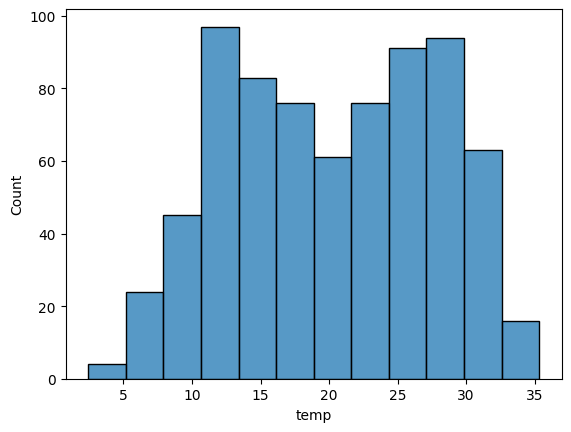

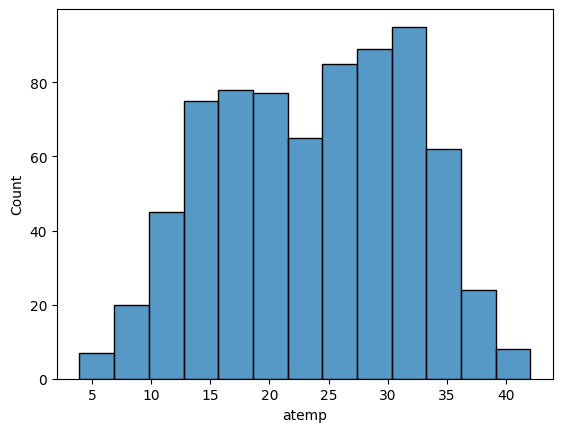

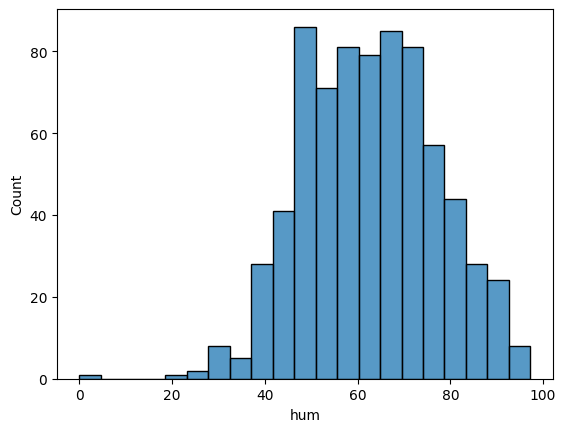

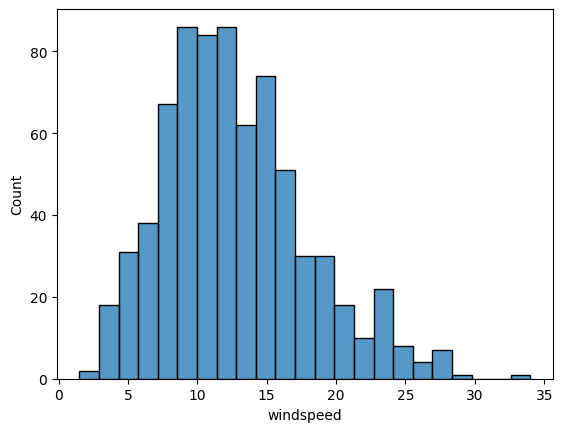

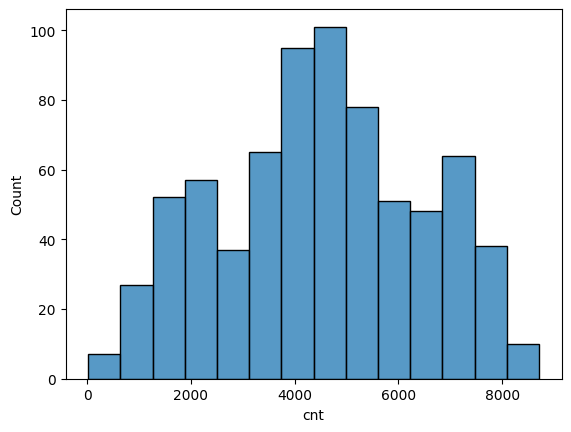

In [517]:
#Univariate Analysis
for i in numeric_columns:
    sns.histplot(x=bikesharing[i])
    plt.show()



### Categorical variables

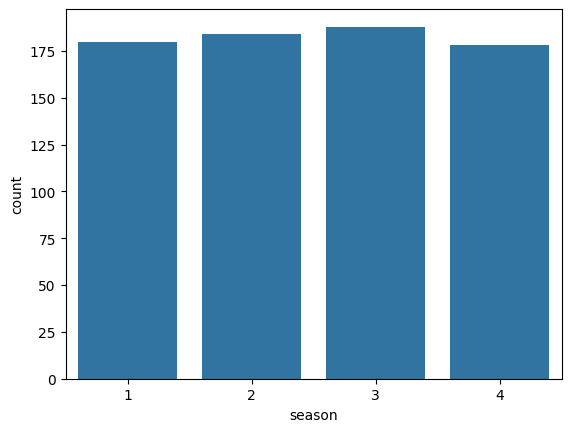

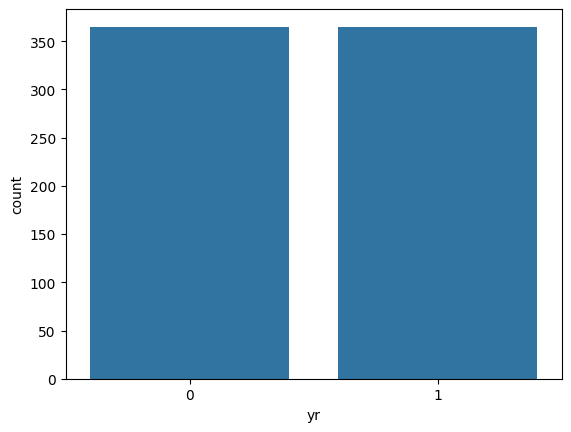

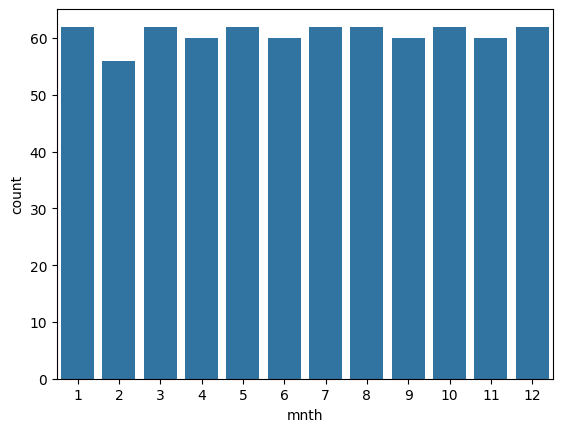

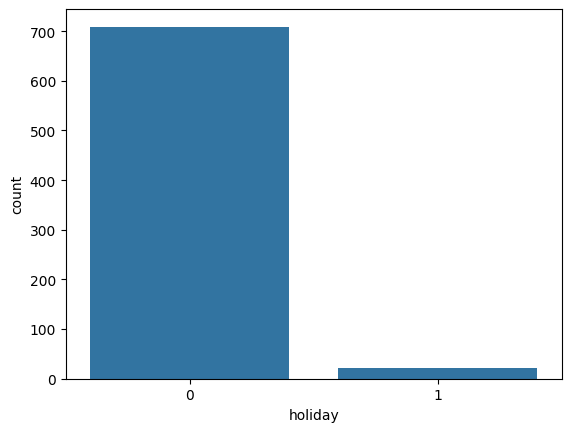

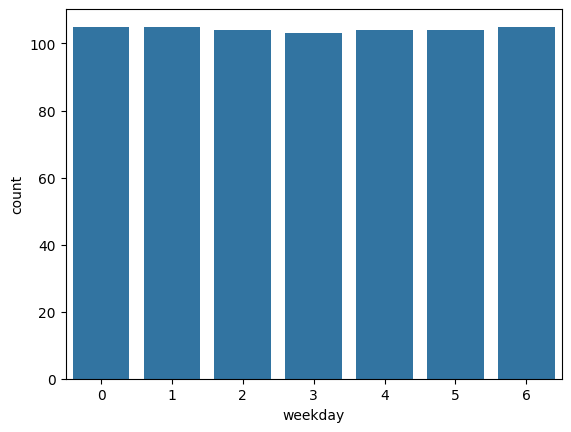

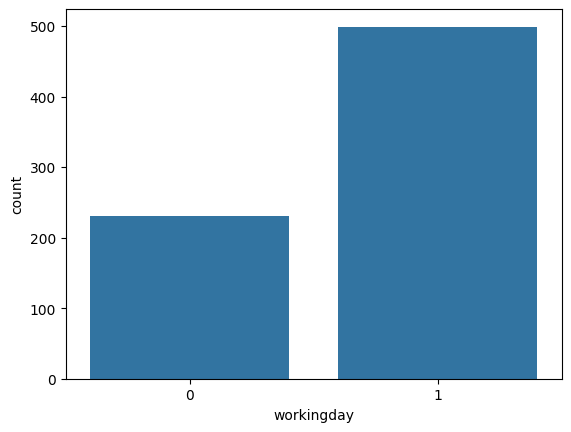

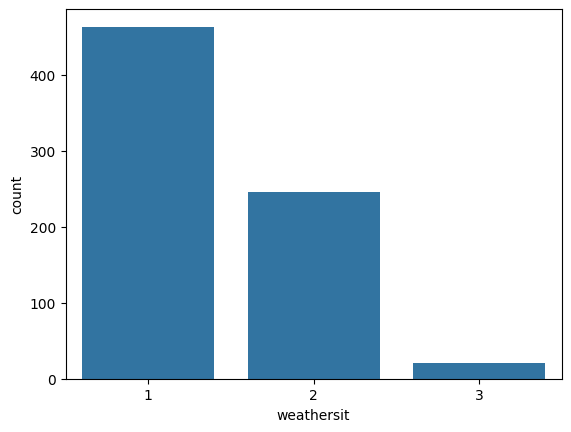

In [518]:
for i in categorical_columns:
    sns.countplot(x=bikesharing[i])
    plt.show()

- holiday = 0 has large data.
- A working day has more count.
- weathersit = 1 has more count.

## Bivariate Analysis

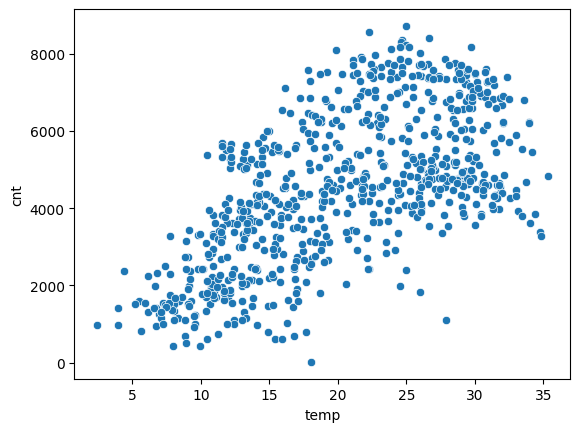

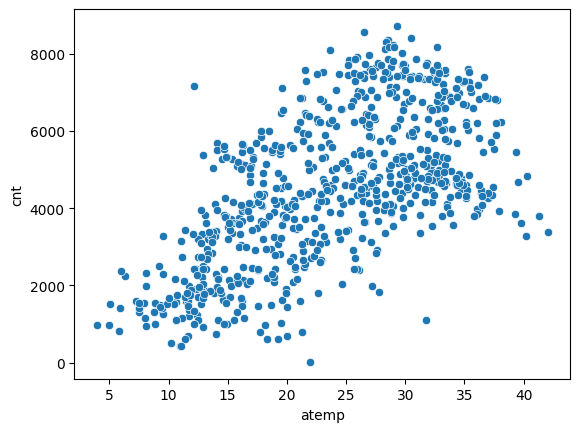

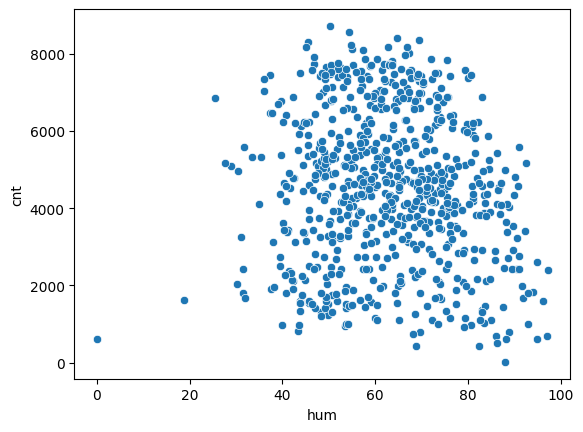

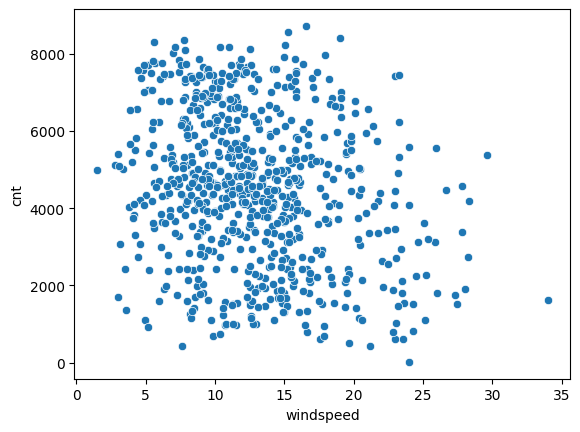

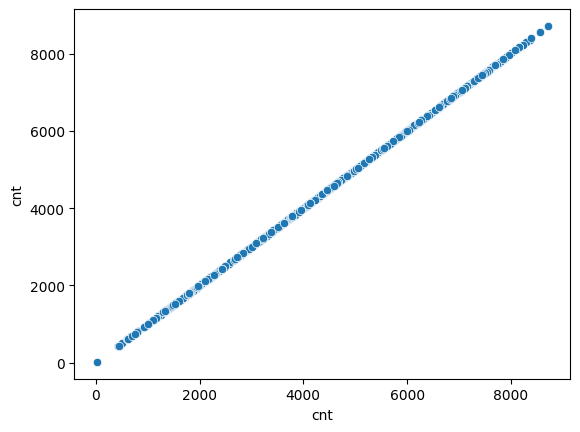

In [519]:

for i in numeric_columns:
    sns.scatterplot(x=bikesharing[i], y=bikesharing["cnt"])
    plt.show()


- temp, a temp seems to have some colinearity.

## Multivariate Analysis

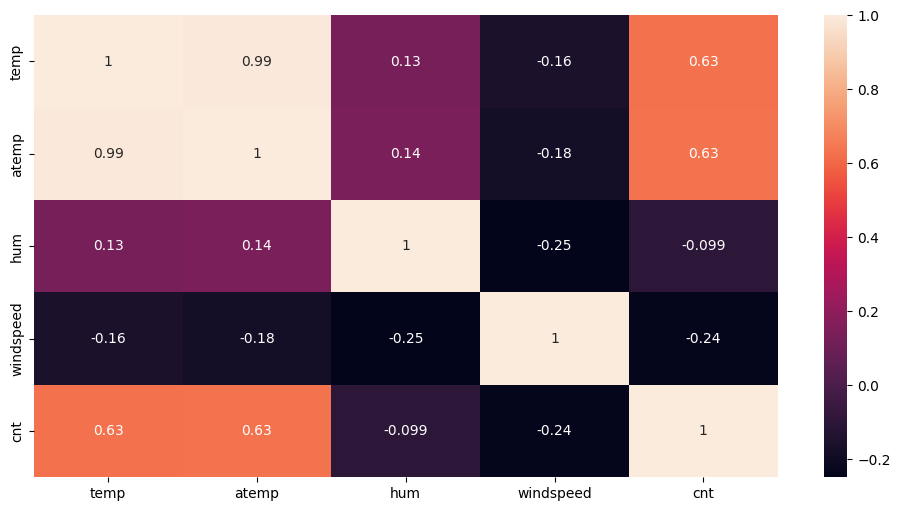

In [520]:
# Multivariate Analysis
plt.figure(figsize=(12,6))
sns.heatmap(bikesharing[numeric_columns].corr(), annot=True)
plt.show()

<Figure size 2000x1500 with 0 Axes>

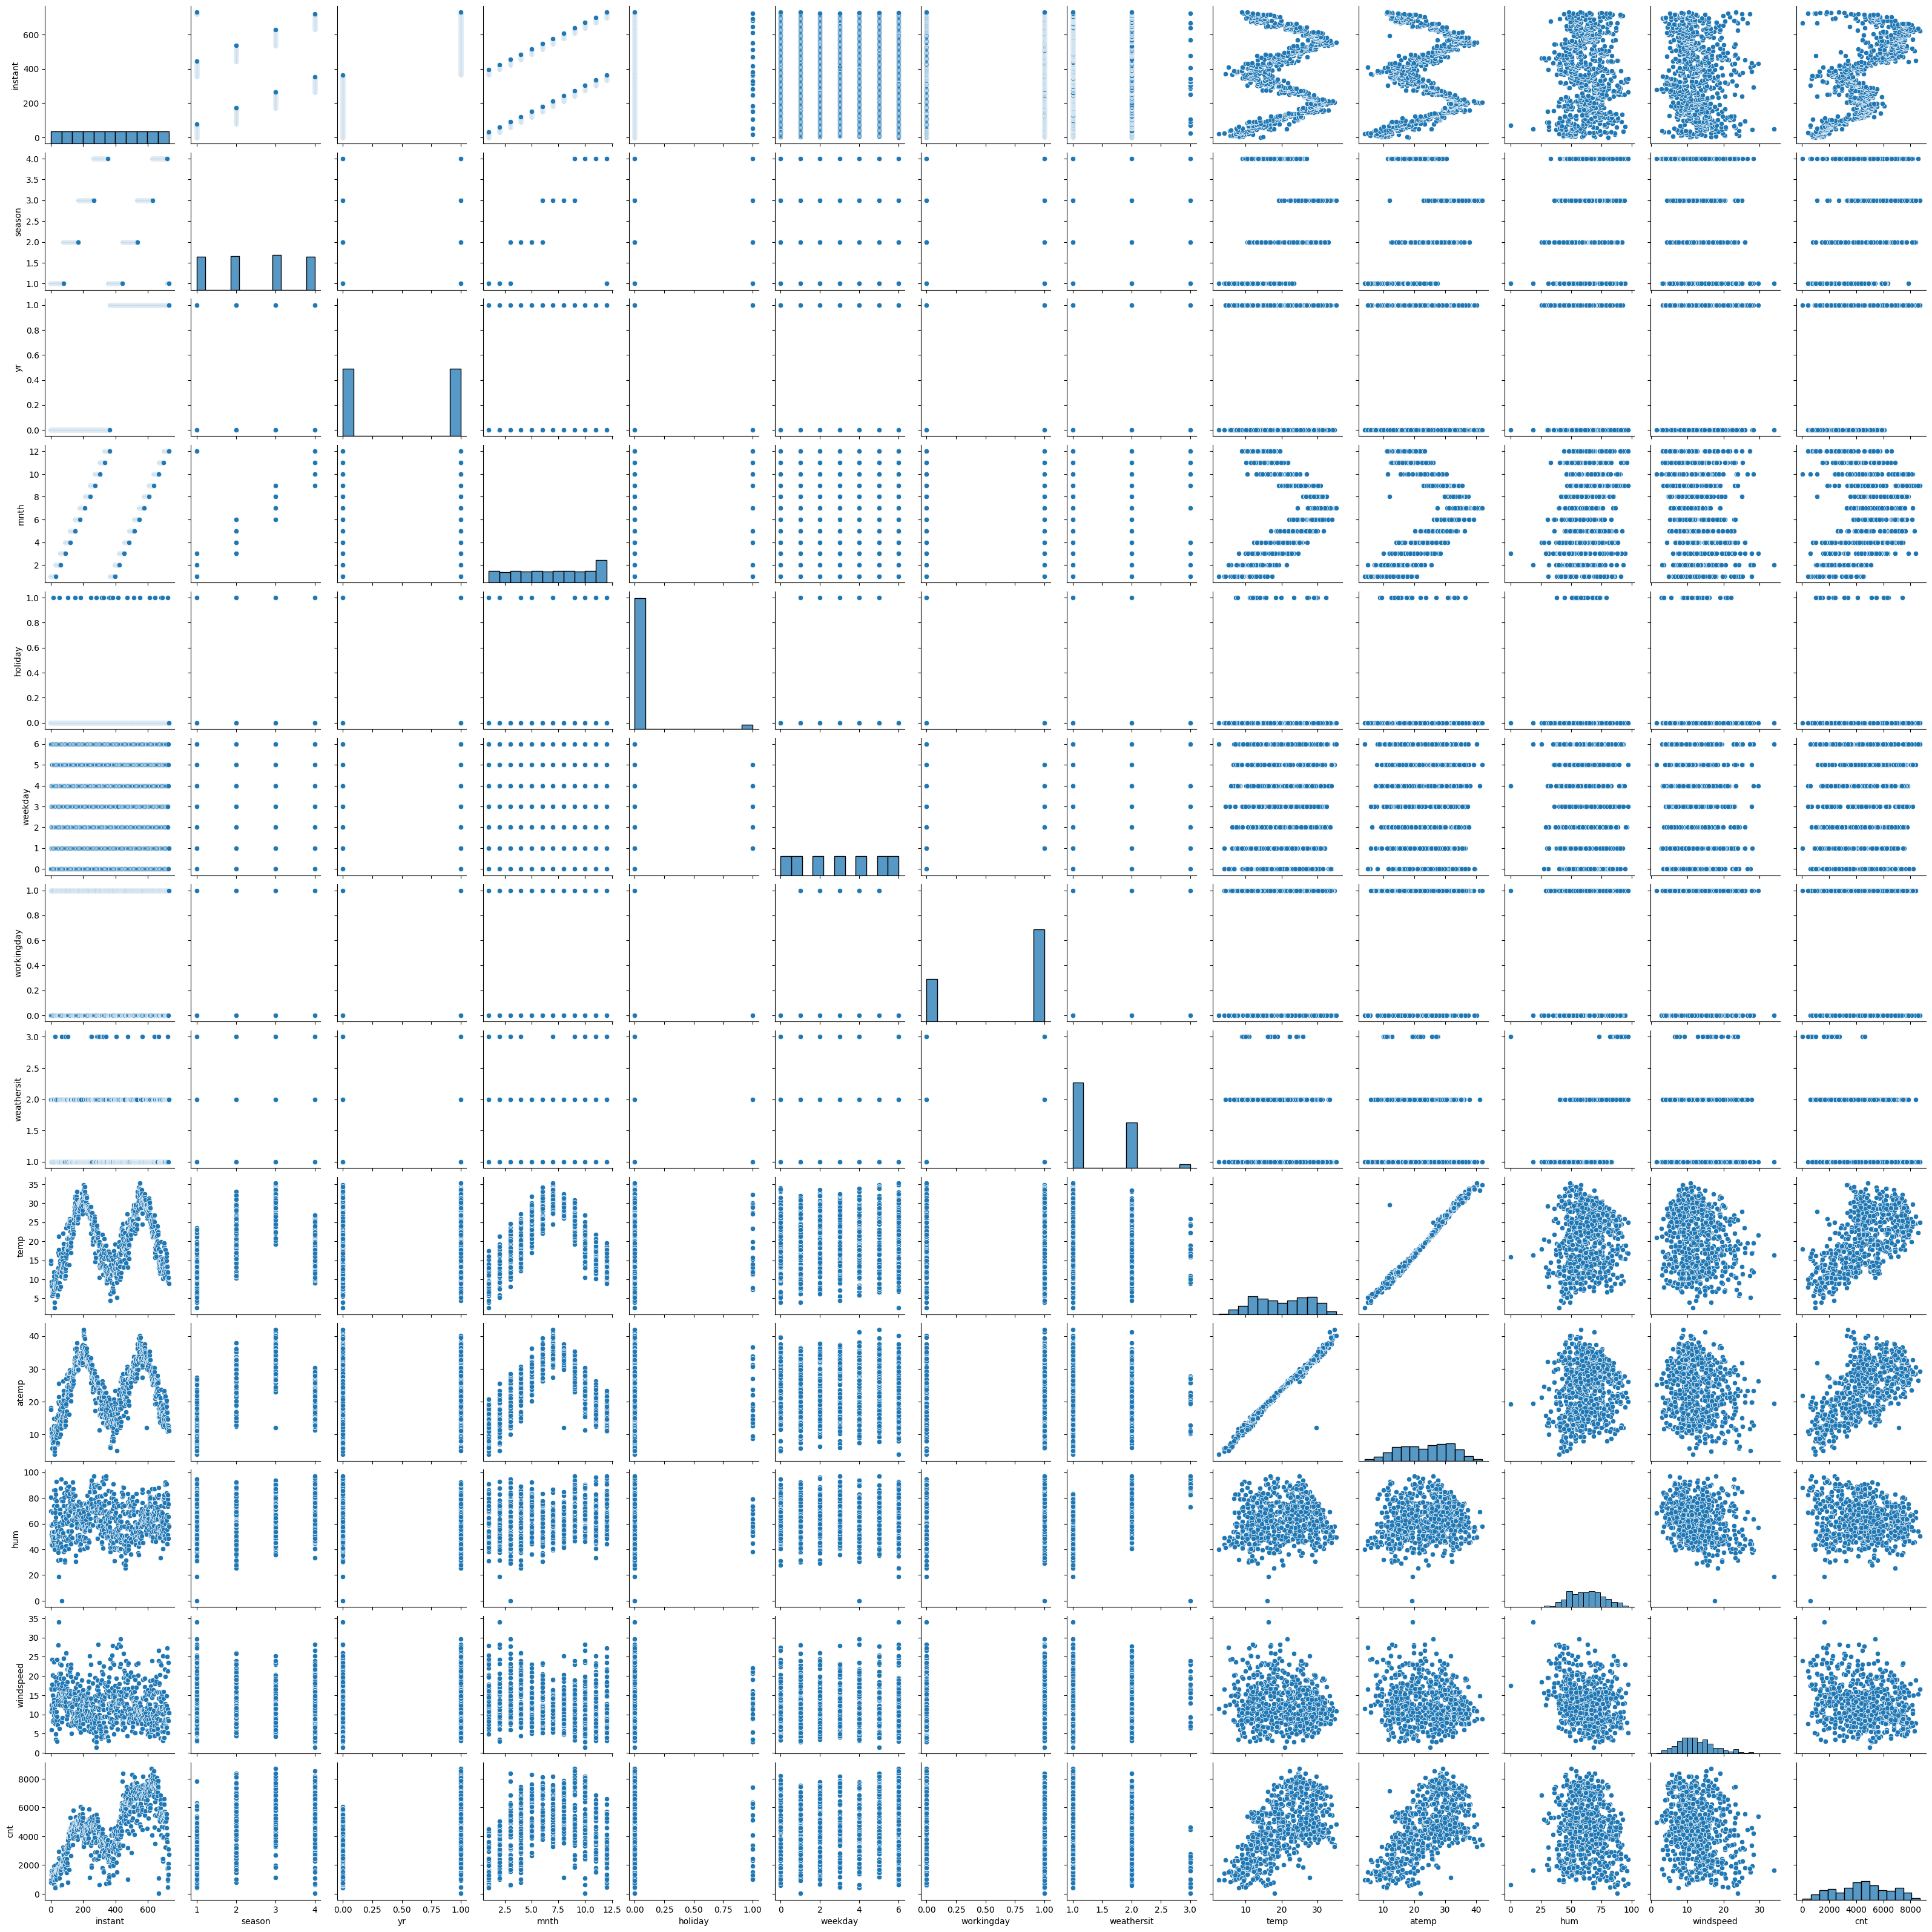

In [521]:

plt.figure(figsize=(20,15))
sns.pairplot(bikesharing)
plt.show()

- we can see that temp, a temp has high linear correlation with cnt.

### Peprocessing Steps

Create dummy variables for categorical columns.

In [522]:
bikesharing.shape

(730, 14)

In [523]:
bikesharing[categorical_columns].nunique()

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [524]:
bikesharing.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [525]:
#number of dummies = n-1
bikesharing = pd.get_dummies(bikesharing, columns=["season", "mnth","weekday","weathersit"], drop_first=True, dtype=int)
bikesharing.shape

(730, 32)

In [526]:
bikesharing.columns

Index(['instant', 'dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [527]:
# dropping dteday column as its redundant with the scaled variables.
bikesharing = bikesharing.drop(columns=["dteday"], axis=1)

In [528]:
bikesharing.columns = bikesharing.columns.astype(str)
bikesharing.columns

Index(['instant', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [529]:
bikesharing.columns.size

31

## Train-Test-Split

In [530]:
X = bikesharing.drop(["cnt"],axis=1)
y = bikesharing["cnt"]


In [531]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

In [532]:
print(X_train.shape)
print(X_test.shape)

(584, 30)
(146, 30)


In [533]:
print(y_train.shape)
print(y_test.shape)

(584,)
(146,)


In [534]:
y_train

367    2236
648    7570
44     1913
705    5008
379    2311
       ... 
578    7261
53     1917
350    2739
79     2077
520    7001
Name: cnt, Length: 584, dtype: int64

## Scaling

In [535]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #As test data is unseen data we can't fit on it.

In [575]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
0,1.0,0.0,1.0,0.113228,0.454701,0.695175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.468352,0.477458,0.299450,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.443431,0.387290,0.807474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.326094,0.787463,0.189819,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.133996,0.431945,0.449210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1.0,0.0,1.0,0.863973,0.679690,0.187140,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
580,0.0,0.0,1.0,0.202618,0.435939,0.111379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,0.0,0.0,0.0,0.248216,0.577930,0.431816,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
582,0.0,0.0,1.0,0.462664,0.759870,0.529881,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [537]:
X_train_df = pd.DataFrame(X_train,columns=X.columns)
X_test_df = pd.DataFrame(X_test,columns=X.columns)

In [538]:
X_train_df.head(2)

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0.503429,1.0,0.0,1.0,0.113228,0.061963,0.454701,0.695175,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.888889,1.0,0.0,1.0,0.468352,0.462175,0.477458,0.299450,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Feature Selection

In [539]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [540]:
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=16)


In [541]:
selector = selector.fit(X_train_df, y_train)
selector.support_

array([False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True, False, False, False, False,  True,
        True,  True, False, False, False, False, False, False, False,
        True,  True,  True])

In [542]:
selected_features = X_train_df.columns[selector.support_]
selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_2',
       'season_3', 'season_4', 'mnth_3', 'mnth_8', 'mnth_9', 'mnth_10',
       'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [543]:
X_train=X_train_df[selected_features]
X_test=X_test_df[selected_features]

## Modeling

In [576]:
import statsmodels.api as sm

In [577]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
0,1.0,0.0,1.0,0.113228,0.454701,0.695175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.468352,0.477458,0.299450,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.443431,0.387290,0.807474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.326094,0.787463,0.189819,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.133996,0.431945,0.449210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1.0,0.0,1.0,0.863973,0.679690,0.187140,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
580,0.0,0.0,1.0,0.202618,0.435939,0.111379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,0.0,0.0,0.0,0.248216,0.577930,0.431816,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
582,0.0,0.0,1.0,0.462664,0.759870,0.529881,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [578]:
X_train_sm=sm.add_constant(X_train)#X_train_sm["const"]=1
X_test_sm=sm.add_constant(X_test)

In [579]:
X_train_sm

,const,yr,holiday,workingday,temp,hum,windspeed,season_2,season_3,season_4,mnth_3,mnth_8,mnth_9,mnth_10,weekday_6,weathersit_2,weathersit_3
0,1.0,1.0,0.0,1.0,0.113228,0.454701,0.695175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,0.0,1.0,0.468352,0.477458,0.299450,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.443431,0.387290,0.807474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,1.0,0.326094,0.787463,0.189819,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.133996,0.431945,0.449210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,1.0,1.0,0.0,1.0,0.863973,0.679690,0.187140,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
580,1.0,0.0,0.0,1.0,0.202618,0.435939,0.111379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581,1.0,0.0,0.0,0.0,0.248216,0.577930,0.431816,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
582,1.0,0.0,0.0,1.0,0.462664,0.759870,0.529881,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [580]:
print(X_train_sm.shape)
print(y_train.shape)

(584, 17)
(584,)


In [581]:
def trainModel(X_train_sm, y_train):
    model=sm.OLS(np.array(y_train),X_train_sm)# Ordinary Least Squares
    res=model.fit()
    return res

In [582]:
res = trainModel(X_train_sm, y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     209.1
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          1.57e-225
Time:                        15:56:18   Log-Likelihood:                -4690.8
No. Observations:                 584   AIC:                             9416.
Df Residuals:                     567   BIC:                             9490.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1559.4898    230.990      6.751      0.000    1105.790    2013.190
yr            1973.9267     63.684     30.996      0.000    1848.841    2099.012
holiday       -468.1001    206.583     -2.266      0.024    -873.861     -62.340
workingday     437.4129     88.922      4.919      0.000     262.756     612.070
temp          4322.0047    266.789     16.200      0.000    3797.989    4846.020
hum          -1373.9520    302.397     -4.544      0.000   -1967.907    -779.997
windspeed    -1592.4761    203.621     -7.821      0.000   -1992.421   -1192.532
season_2      1124.9893    120.132      9.365      0.000     889.031    1360.947
season_3       395.3952    177.211      2.231      0.026      47.326     743.465
season_4      1323.1595    111.411     11.876      0.000    1104.330    1541.988
mnth_3         234.6172    117.035      2.005      0.045       4.743     464.491
mnth_8         389.2105    140.222      2.776      0.006     113.793     664.628
mnth_9         970.5760    134.877      7.196      0.000     705.656    1235.496
mnth_10        476.6457    135.727      3.512      0.000     210.057     743.234
weekday_6      516.1462    113.953      4.529      0.000     292.324     739.968
weathersit_2  -500.8873     83.399     -6.006      0.000    -664.695    -337.080
weathersit_3 -2257.4836    215.307    -10.485      0.000   -2680.380   -1834.588
==============================================================================
Omnibus:                      101.133   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              265.995
Skew:                          -0.870   Prob(JB):                     1.74e-58
Kurtosis:                       5.811   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [583]:
#Finding VIF

# finding VIF

def measure_VIF(X_train_sm):
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    vif_data=pd.DataFrame()
    vif_data["Feature"]=X_train_sm.columns

    vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) 
                    for i in range(len(X_train_sm.columns))]
    return vif_data

In [584]:
measure_VIF(X_train_sm)

,Feature,VIF
0,const,54.519135
1,yr,1.035240
2,holiday,1.161965
3,workingday,1.792361
4,temp,3.686512
5,hum,1.940069
6,windspeed,1.195297
7,season_2,2.739491
8,season_3,6.043886
9,season_4,2.378056


In [585]:
#removing month 3 as its greater then .05
X_train_sm = X_train_sm.drop(columns=["mnth_3"],axis=1)
X_test_sm = X_test_sm.drop(columns=["mnth_3"],axis=1)

In [586]:
vif_data[vif_data.VIF > 5]

,Feature,VIF
0,const,54.519135
8,season_3,6.043886


In [587]:
#removing season_3 as its VIF > 5
X_train_sm = X_train_sm.drop(columns=["season_3"],axis=1)
X_test_sm = X_test_sm.drop(columns=["season_3"],axis=1)

In [588]:
#again training and calculating VIF
res = trainModel(X_train_sm, y_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     236.2
Date:                Tue, 27 Aug 2024   Prob (F-statistic):          2.77e-226
Time:                        15:56:18   Log-Likelihood:                -4694.7
No. Observations:                 584   AIC:                             9419.
Df Residuals:                     569   BIC:                             9485.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1601.5780    230.281      6.955      0.000    1149.273    2053.883
yr            1960.6886     63.765     30.749      0.000    1835.445    2085.932
holiday       -497.5308    207.271     -2.400      0.017    -904.640     -90.422
workingday     442.8297     89.260      4.961      0.000     267.511     618.148
temp          4727.7709    175.962     26.868      0.000    4382.156    5073.386
hum          -1469.5878    301.453     -4.875      0.000   -2061.684    -877.492
windspeed    -1613.5817    203.677     -7.922      0.000   -2013.631   -1213.532
season_2       936.5450     86.496     10.828      0.000     766.654    1106.436
season_4      1172.7494     95.926     12.226      0.000     984.337    1361.161
mnth_8         485.1898    131.423      3.692      0.000     227.057     743.323
mnth_9        1050.2750    129.135      8.133      0.000     796.635    1303.915
mnth_10        436.4258    134.987      3.233      0.001     171.293     701.559
weekday_6      524.4012    114.439      4.582      0.000     299.626     749.176
weathersit_2  -491.3095     83.691     -5.871      0.000    -655.691    -326.928
weathersit_3 -2197.2147    215.047    -10.217      0.000   -2619.597   -1774.833
==============================================================================
Omnibus:                       87.568   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              222.454
Skew:                          -0.770   Prob(JB):                     4.95e-49
Kurtosis:                       5.602   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [589]:
vif = measure_VIF(X_train_sm)
vif

,Feature,VIF
0,const,53.662582
1,yr,1.027860
2,holiday,1.158435
3,workingday,1.788561
4,temp,1.588213
5,hum,1.909372
6,windspeed,1.184408
7,season_2,1.406491
8,season_4,1.745931
9,mnth_8,1.442247


In [590]:
#doing the prediction as vif and p-values look under control. vif < 5 and p value < .05
y_train_pred=res.predict(X_train_sm)
y_test_pred=res.predict(X_test_sm)

In [605]:
sorted_params_ascending = res.params.sort_values(ascending=False)
print(sorted_params_ascending)

temp            4727.770871
yr              1960.688569
const           1601.577953
season_4        1172.749353
mnth_9          1050.274962
season_2         936.544991
weekday_6        524.401243
mnth_8           485.189822
workingday       442.829652
mnth_10          436.425809
weathersit_2    -491.309545
holiday         -497.530793
hum            -1469.587839
windspeed      -1613.581732
weathersit_3   -2197.214679
dtype: float64


In [592]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))

Train: 0.853 Test: 0.767


### we can see the equation for the best fit line is for top 3 impact variables

cnt = temp + yr - weathersit_3